In [1]:
# Data preprocessing
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Deep learning
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm as tqdm
from tensorflow.keras.models import load_model



import os

In [2]:
DATASET_DIR = "/Users/yeezy/Documents/Covid - Normal - Test"

os.listdir(DATASET_DIR)

['.DS_Store',
 'test',
 'CNN_simp_Test final.ipynb',
 'CNN_Mid_Change_Arch.ipynb',
 'Lime',
 'Old NB',
 'split_dataset.py',
 'CNN_Mid_Lime.ipynb',
 'CNN_Mid_Test.ipynb',
 'train',
 'Normal',
 '.ipynb_checkpoints',
 'Mid.ipynb',
 'Transfer Learning.ipynb',
 'MID_FOR_CAM.hdf5',
 'COVID',
 'MID_CNN_MODEL.hdf5',
 '.idea',
 'CAM_CNN.ipynb']

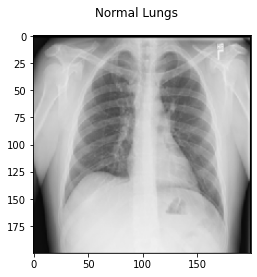

In [3]:
normal_images = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/Normal/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (200,200,3)))
    
fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[0], cmap="gray")
plt.show()

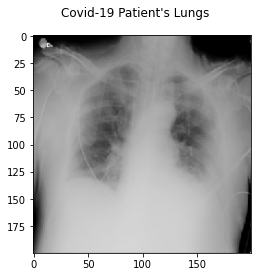

In [4]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/COVID/*"): 
    covid_images.append(image.load_img(str(img_path), target_size = (200,200,3)))
    
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[0], cmap = "gray")
plt.show()

In [5]:
print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")

3616 normal patient images
3616 covid patient images


In [6]:
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
targets = np.zeros(len(images_together))
targets[:len(normal_images)-1] = 1 # normal-> 1, covid-19-> 0

In [7]:
print("image list length: ",len(images_together))
print("target list length: ",len(targets))

image list length:  7232
target list length:  7232


In [8]:
targets = np.array(targets)
print("targets: ",targets.shape)
targets = targets.reshape(-1,1)
print("new shape of targets: ",targets.shape)

targets:  (7232,)
new shape of targets:  (7232, 1)


In [9]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (7232, 200, 200, 3)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.2, stratify=targets)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

In [11]:
new_model = load_model('MID_CNN_MODEL.hdf5')

In [12]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [13]:
explainer = lime_image.LimeImageExplainer()

In [14]:
# Correctly Predicted Images

In [15]:
pred = new_model.predict(images_together)

In [16]:
targets

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [17]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
#Pred List and Target List
pred_list = []
target_list = []
for i in range(0,7232):
    if pred[i][0] == 1.0:
        pred_list.append(1)
    else:
        pred_list.append(0)
    if targets[i][0] == 1.0:
        target_list.append(1)
    else:
        target_list.append(0)       

In [ ]:
pred_list

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confmat = confusion_matrix(pred_list, target_list)
print(precision_score(pred_list, target_list))
print(recall_score(pred_list, target_list))
print(f1_score(pred_list, target_list))

In [ ]:
covid_preds = []
for i in range(0, 7232):
    if pred_list[i] == 0:
        covid_preds.append(i)

In [ ]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(0,len(covid_preds))
    randomlist.append(covid_preds[n])
print(randomlist)

In [ ]:
# x = images_together[738]
# x = x.astype('double')
# y = int(targets[738][0])
# print(pred_list[738])
# print(target_list[738])
# print(y)
# explanation = explainer.explain_instance(x, new_model.predict, top_labels=2, hide_color=0, num_samples=1000)
# source_image, mask = explanation.get_image_and_mask(0, positive_only=True, num_features = 2)
# plt.imshow((mark_boundaries(source_image, mask) * 255).astype(np.uint8))

In [ ]:
# pred_inverse = []
# for i in pred_list:
#     if i == 0:
#         pred_inverse.append(1)
#     else:
#         pred_inverse.append(0)

In [ ]:
def interpert(new_model, images_together, pred_list, im_id):
    x = images_together[im_id]
    x = x.astype('double')
    p = pred_list[im_id]
    lime_path = ""
    if p ==0:
        lime_path = "/Users/yeezy/Documents/Covid - Normal - Test/Lime/covid/"
    else:
        lime_path = "/Users/yeezy/Documents/Covid - Normal - Test/Lime/normal/"

    explanation = explainer.explain_instance(x, new_model.predict, top_labels=2, hide_color=0, num_samples=1000)
    source_image, mask = explanation.get_image_and_mask(p, positive_only=False) 
    matplotlib.image.imsave(lime_path + str(im_id)+ '_lime.png', (mark_boundaries(source_image, mask) * 255).astype(np.uint8))
